# Import the libraries and dataset

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
import statsmodels.api as sm
import statsmodels
import missingno as msno
%matplotlib notebook
import pandas_profiling as pdp

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [14]:
data = pd.read_excel("wage2.xlsx", sheet_name="homework")

# Check the data

In [3]:
data.head(10)

,wage,educ,exper,tenure,meduc,feduc
0,769,12,11,2,8,8
1,808,18,11,16,14,14
2,825,14,11,9,14,14
3,650,12,13,7,12,12
4,562,11,14,5,6,11
5,1154,15,13,1,14,5
6,1000,12,16,16,12,11
7,930,18,8,13,13,14
8,1318,16,7,2,10,10
9,1792,16,9,9,12,12


In [4]:
# # Show the profile report
# pdp.ProfileReport(data)

In [5]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 6 columns):
wage      641 non-null int64
educ      641 non-null int64
exper     641 non-null int64
tenure    641 non-null int64
meduc     641 non-null int64
feduc     641 non-null int64
dtypes: int64(6)
memory usage: 30.1 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002284798F940>,
      dtype=object)

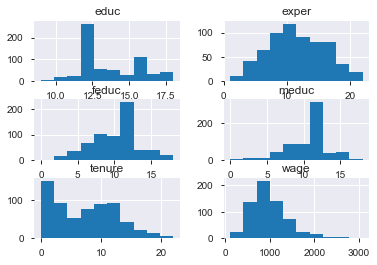

In [6]:
# Dataのデータフレームのヒストグラムを作成
data.hist()

# (ⅰ)

### Run the four regression models
### Create the table for expressing the results

## model(1)

In [7]:
# Choose the variables
y = np.log(data["wage"])
x2 = data[["educ","exper"]]

# Run the regression
x = sm.add_constant(x2)
results = sm.OLS(y,x).fit()

# Show the results
results.summary()

C:\Users\Yuzi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     56.99
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           1.69e-23
Time:                        17:06:34   Log-Likelihood:                -293.01
No. Observations:                 641   AIC:                             592.0
Df Residuals:                     638   BIC:                             605.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4667      0.131     41.827      0.000       5.210       5.723
educ           0.0804      0.008     10.611      0.000       0.066       0.095
exper          0.0226      0.004      5.775      0.000       0.015       0.030
==============================================================================
Omnibus:                       30.740   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.858
Skew:                          -0.371   Prob(JB):                     2.46e-11
Kurtosis:                       4.131   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## model(2)

In [8]:
# Choose the variables
y = np.log(data["wage"])
x2 = data[["educ","exper", "meduc"]]

# Run the regression
x = sm.add_constant(x2)
results = sm.OLS(y,x).fit()

# Show the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     42.58
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           4.37e-25
Time:                        17:06:34   Log-Likelihood:                -287.12
No. Observations:                 641   AIC:                             582.2
Df Residuals:                     637   BIC:                             600.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3800      0.132     40.749      0.000       5.121       5.639
educ           0.0713      0.008      8.949      0.000       0.056       0.087
exper          0.0227      0.004      5.836      0.000       0.015       0.030
meduc          0.0195      0.006      3.438      0.001       0.008       0.031
==============================================================================
Omnibus:                       32.762   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.968
Skew:                          -0.387   Prob(JB):                     3.15e-12
Kurtosis:                       4.177   Cond. No.                         185.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## model(3)

In [9]:
# Choose the variables
y = np.log(data["wage"])
x2 = data[["educ","exper", "feduc"]]

# Run the regression
x = sm.add_constant(x2)
results = sm.OLS(y,x).fit()

# Show the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     41.69
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           1.31e-24
Time:                        17:06:35   Log-Likelihood:                -288.23
No. Observations:                 641   AIC:                             584.5
Df Residuals:                     637   BIC:                             602.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4279      0.130     41.615      0.000       5.172       5.684
educ           0.0707      0.008      8.652      0.000       0.055       0.087
exper          0.0235      0.004      6.028      0.000       0.016       0.031
feduc          0.0158      0.005      3.093      0.002       0.006       0.026
==============================================================================
Omnibus:                       32.595   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.337
Skew:                          -0.387   Prob(JB):                     4.32e-12
Kurtosis:                       4.166   Cond. No.                         180.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## model(4)

In [10]:
# Choose the variables
y = np.log(data["wage"])
x2 = data[["educ","exper","meduc","feduc"]]

# Run the regression
x = sm.add_constant(x2)
results = sm.OLS(y,x).fit()

# Show the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     32.67
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           8.64e-25
Time:                        17:06:37   Log-Likelihood:                -285.80
No. Observations:                 641   AIC:                             581.6
Df Residuals:                     636   BIC:                             603.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3798      0.132     40.799      0.000       5.121       5.639
educ           0.0679      0.008      8.241      0.000       0.052       0.084
exper          0.0232      0.004      5.958      0.000       0.016       0.031
meduc          0.0143      0.007      2.200      0.028       0.002       0.027
feduc          0.0095      0.006      1.616      0.107      -0.002       0.021
==============================================================================
Omnibus:                       33.203   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.647
Skew:                          -0.391   Prob(JB):                     2.24e-12
Kurtosis:                       4.182   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# （ⅱ）

### For model(4)
### test H0: beta3 = 0
### two-sided at the 5% level

In [11]:
# Choose the variables
y = np.log(data["wage"])
x2 = data[["educ","exper","meduc","feduc"]]

# Run the regression
x = sm.add_constant(x2)
results = sm.OLS(y,x).fit()

# Show the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     32.67
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           8.64e-25
Time:                        17:09:31   Log-Likelihood:                -285.80
No. Observations:                 641   AIC:                             581.6
Df Residuals:                     636   BIC:                             603.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3798      0.132     40.799      0.000       5.121       5.639
educ           0.0679      0.008      8.241      0.000       0.052       0.084
exper          0.0232      0.004      5.958      0.000       0.016       0.031
meduc          0.0143      0.007      2.200      0.028       0.002       0.027
feduc          0.0095      0.006      1.616      0.107      -0.002       0.021
==============================================================================
Omnibus:                       33.203   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.647
Skew:                          -0.391   Prob(JB):                     2.24e-12
Kurtosis:                       4.182   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# （ⅳ）

In [ ]:
r_sqr_ur = 0.17
r_sqr_r = 0.152
df_ur = 636
df_r = 638
q = df_r - df_ur

F = ((r_sqr_ur - r_sqr_r)/q) / ((1-r_sqr_ur)/df_ur)

In [ ]:
F

# （ⅵ）

In [ ]:
data["mfeduc"] = data["meduc"] + data["feduc"]

In [ ]:
# Choose the variables
y = np.log(data["wage"])
x2 = data[["educ","exper","mfeduc", "feduc"]]

# Run the regression
x = sm.add_constant(x2)
results = sm.OLS(y,x).fit()

# Show the results
results.summary()